# Weather at Knock Airport

This notebook covers the process of reading in data from a CSV file, cleaning it, and then plotting it. The data is weather data from Knock Airport in Ireland.

The first step is to import the required libraries. In this process we will use pandas to create the dataframe of the csv file, matplotlib and seaborn to plot the data and datetime to correctly handle the date and timestamps.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

Use `read.csv` to import the data. Checking the data on this link shows the actual data dopes not start at row 1 so `skiprows=23` is added to the `read_csv()` to tell pandas where to find the data. To reduce the size of the dataframe we will only import the date, temperature and windspeed columns.

In [6]:
fields = ['date', 'temp', 'wdsp']
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23, usecols=fields, dtype = {'temp':float, 'windsp': object}, parse_dates=['date'])
print(df.info())

C:\Users\kirst\AppData\Local\Temp\ipykernel_31804\1797585910.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23, usecols=fields, dtype = {'temp':float, 'windsp': object}, parse_dates=['date'])
C:\Users\kirst\AppData\Local\Temp\ipykernel_31804\1797585910.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23, usecols=fields, dtype = {'temp':float, 'windsp': object}, parse_dates=['date'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248394 entries, 0 to 248393
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    248394 non-null  datetime64[ns]
 1   temp    248394 non-null  float64       
 2   wdsp    248394 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 5.7+ MB
None


Then the data in the dataframe is manipulated to split the date from the timestamp and put this into a new column. New columns are also added for the month and the year with this data extracted from the timestamp.

In [7]:
df['date_only'] = pd.to_datetime(df['date'].dt.date)
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
print(df.head(3))

                 date  temp wdsp  date_only  month  year
0 1996-04-10 14:00:00  11.5    0 1996-04-10      4  1996
1 1996-07-31 08:00:00  11.5    0 1996-07-31      7  1996
2 1996-07-31 09:00:00  11.6    0 1996-07-31      7  1996


## Plotting the data

### Plot of the temperature

To plot the daily temperature as a continuous series I have used `matplotlib`.

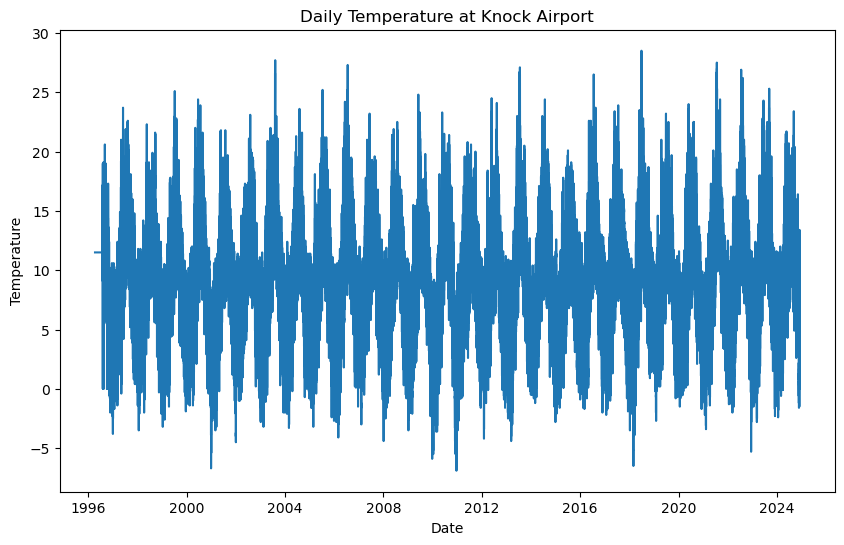

In [8]:
df.set_index('date', inplace=True)
plt.figure(figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Daily Temperature at Knock Airport')
plt.plot(df['temp'], label='Temperature')
plt.show()

To enable graphical comparison of the temperature on a particular date in each year we group the data by year and plot the group, iterating through each year at a time. To plot the data against month I have manually set the x tick intervals and labels. A legend has been added to the chart and I've repurposed the code at [('geeks for geeks)](https://www.geeksforgeeks.org/how-to-place-legend-outside-of-the-plot-in-matplotlib/) to move the legend outside the plot area. This chart is incredibly hard to read due to the amount of data.

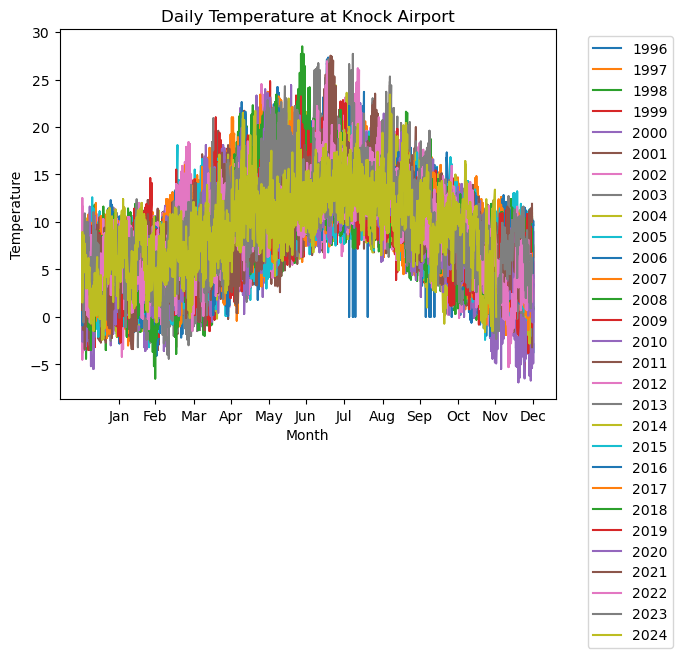

In [9]:
fig, ax = plt.subplots()

# Group by year
for year, group in df.groupby('year'):
    # Sort by date to ensure proper plotting
    group = group.sort_values(by='date_only')
    plt.plot(group['date_only'].dt.dayofyear, group['temp'], label=f'{year}')
    
#Set x ticks at particular positions
ax.set_xticks([31, 60, 91, 121, 152, 182,213,244,274,305,335,366])
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Daily Temperature at Knock Airport')

# Add a legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Show plot
plt.show()

### The mean temperature each day
To plot by the mean temperature each day we can use the `groupby` command in pandas.


In [10]:
daily_mean_temp = df.groupby('date_only')['temp'].mean().reset_index('date_only')
print(daily_mean_temp.head())


   date_only       temp
0 1996-04-10  11.500000
1 1996-07-31  12.650000
2 1996-08-01  11.666667
3 1996-08-02  12.504167
4 1996-08-03  14.266667


Then add a column for month and year to make plotting easier.

In [11]:
daily_mean_temp['month'] = daily_mean_temp['date_only'].dt.month
daily_mean_temp['year'] = daily_mean_temp['date_only'].dt.year
print(daily_mean_temp.head())

   date_only       temp  month  year
0 1996-04-10  11.500000      4  1996
1 1996-07-31  12.650000      7  1996
2 1996-08-01  11.666667      8  1996
3 1996-08-02  12.504167      8  1996
4 1996-08-03  14.266667      8  1996


Then reuse the code from plotting the full temperature to plot the mean temperature for each day.

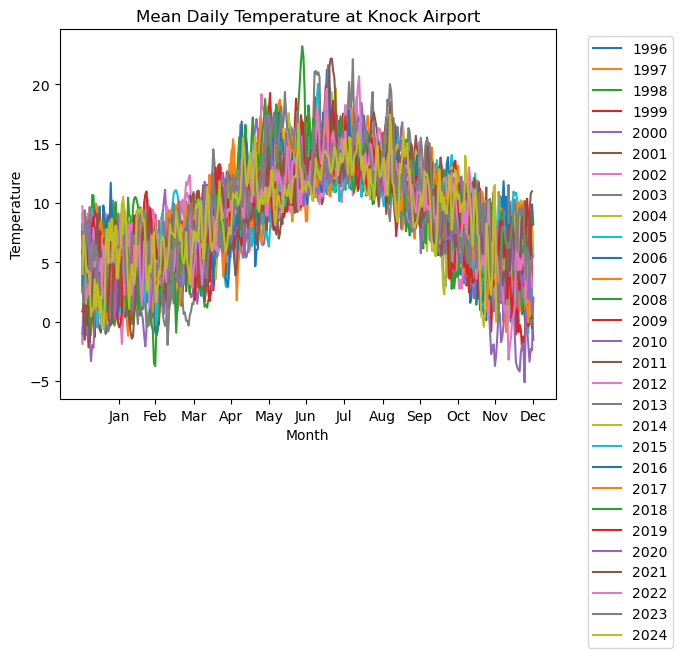

In [12]:
fig, ax = plt.subplots()

# Group by year
for year, group in daily_mean_temp.groupby('year'):
    # Sort by date to ensure proper plotting
    group = group.sort_values(by='date_only')
    plt.plot(group['date_only'].dt.dayofyear, group['temp'], label=f'{year}')
    
#Set x ticks at particular positions
ax.set_xticks([31, 60, 91, 121, 152, 182,213,244,274,305,335,366])
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Mean Daily Temperature at Knock Airport')

# Add a legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Show plot
plt.show()

### The mean temperature for each month

To calculate the mean temperature for each month use `groupby` on the original dataframe.

In [13]:
monthly_mean_temp = df.groupby(['year', 'month'])['temp'].mean().reset_index()
print(monthly_mean_temp.head())


   year  month       temp
0  1996      4  11.500000
1  1996      7  12.650000
2  1996      8  12.946909
3  1996      9  12.174306
4  1996     10   9.614113


This data has been plotted using a seaborn line plot, due to the easy to format commands. The plot will automatically plot against the months in numerical format, to make it easier to read I have manually set the x ticks to the month names.

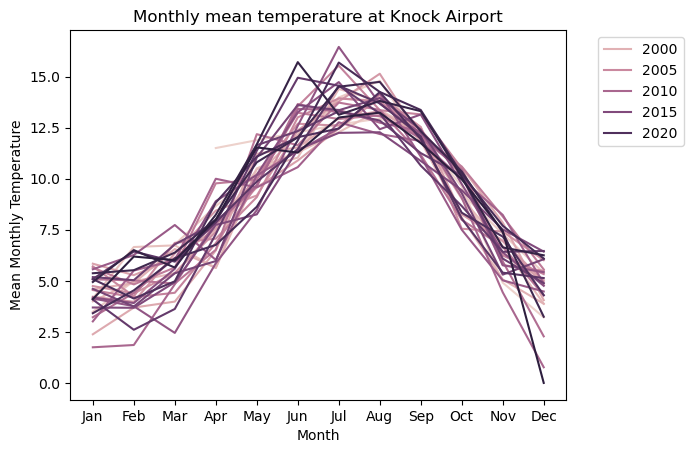

In [14]:
# Create the lineplot
g= sns.lineplot(data=monthly_mean_temp, x='month', y='temp', hue='year')

# Set the title and labels
plt.title('Monthly mean temperature at Knock Airport')
plt.xlabel('Month')
plt.ylabel('Mean Monthly Temperature')

# Manually set the x-axis labels
g.set_xticks(range(1, 13))
g.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Show the plot
plt.show()

## The mean temperature for each month
The Windspeed (there is data missing from this column)
The rolling windspeed (say over 24 hours)
### The max windspeed for each day

The monthly mean of the daily max windspeeds (yer I am being nasty here)

### The max windspeed for each day
There is some missing data from the windspeed column, to drop this data use `dropna()`. To keep things clean I am going to create a clean dataset with just the windspeed and date. 

In [ ]:
cleandf = df[["date_only","wdsp"]]
cleandf.dropna(inplace=True)
print(cleandf.describe())

In [ ]:
daily_max_wind = df.groupby('date_only')['wdsp'].mean()

print(df.info())